In [2]:
# Pandas y otros
import pandas as pd
import numpy as np

In [4]:
# Mathplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)

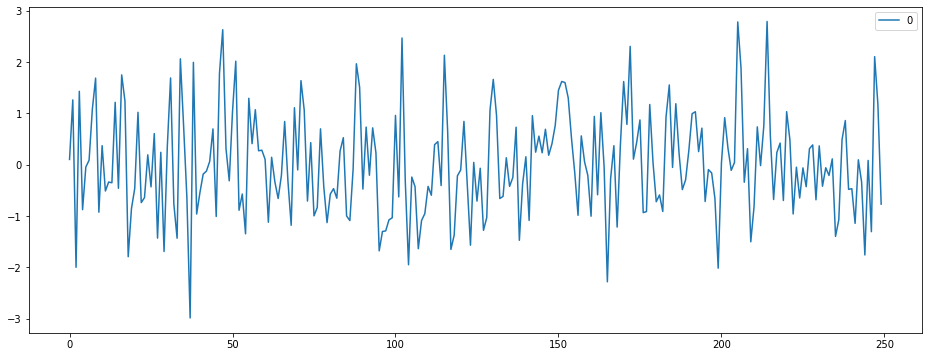

In [20]:
data1 = pd.DataFrame(np.random.randn(250))
data1.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x6b03c9d0>]],
      dtype=object)

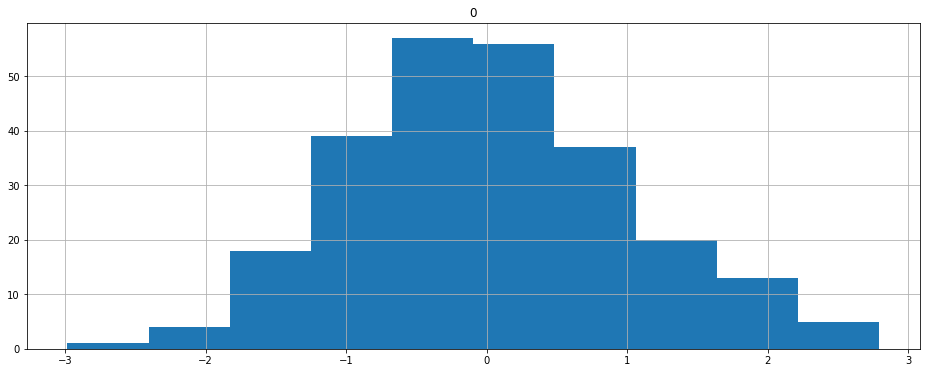

In [21]:
data1.hist()

In [22]:
data1.std() # desviacion estandar

0    1.009477
dtype: float64

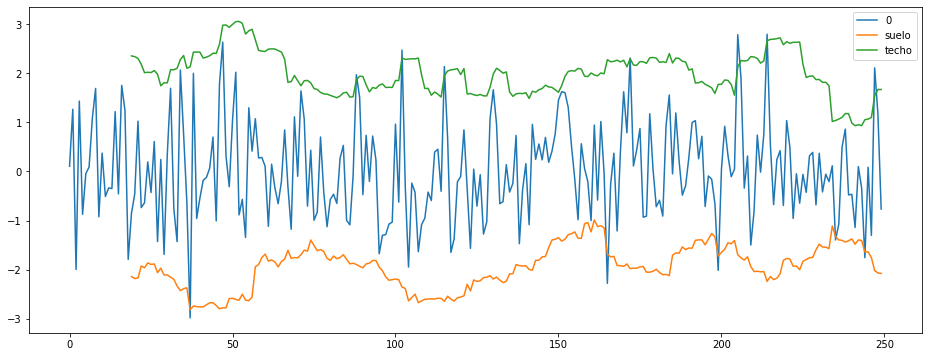

In [23]:
wind = 20
sigma = 2 # 2 desviaciones estadar menos del 20% de data estara aqui chevi chev
# para efectos de visualizar se define un limite inferior "suelo" y superior "techo" en el
# dataset.  2*desviacion estandar de un grupo tomado cada 20 valores

data1["suelo"] = data1[0].rolling(window=wind)\
    .mean() - (sigma * data1[0].rolling(window=wind).std())
data1["techo"] = data1[0].rolling(window=wind)\
    .mean() + (sigma * data1[0].rolling(window=wind).std())
data1.plot()

In [36]:
print(data1[0],data1[0].rolling(2).mean()) #sum()/2) #el promedio de cada 2 datos

0      0.104561
1      1.264748
2     -1.997190
3      1.432606
4     -0.873075
         ...   
245    0.085536
246   -1.302809
247    2.107540
248    1.171771
249   -0.766018
Name: 0, Length: 250, dtype: float64 0           NaN
1      0.684654
2     -0.366221
3     -0.282292
4      0.279766
         ...   
245   -0.835700
246   -0.608637
247    0.402366
248    1.639656
249    0.202877
Name: 0, Length: 250, dtype: float64


In [24]:
data1["anom"] = data1.apply(
    lambda row: row[0] if (row[0]<=row["suelo"] or row[0]>=row["techo"]) else 0, axis=1)

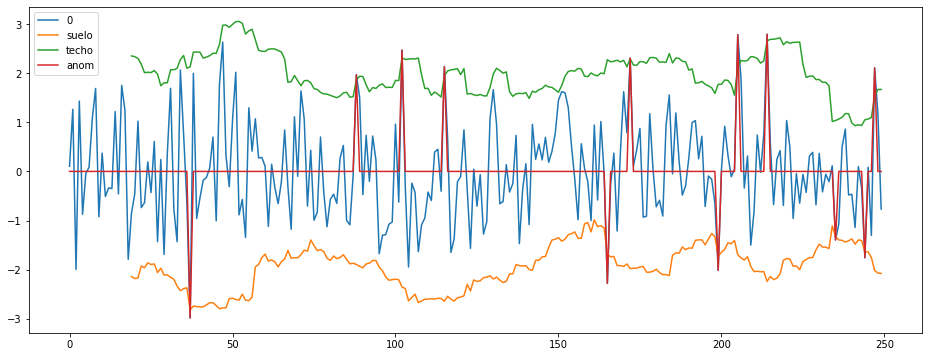

In [25]:
data1.plot()

In [12]:
data = pd.read_csv("github_commits_2014_2018.csv", index_col=1 )
data.head()

,count
date,
2014-01-01,33141
2014-01-02,58431
2014-01-03,61279
2014-01-04,45714
2014-01-05,46093


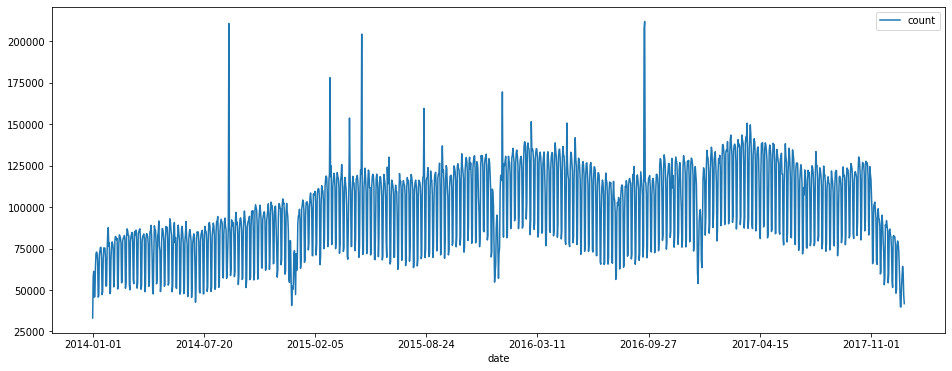

In [13]:
data.plot()

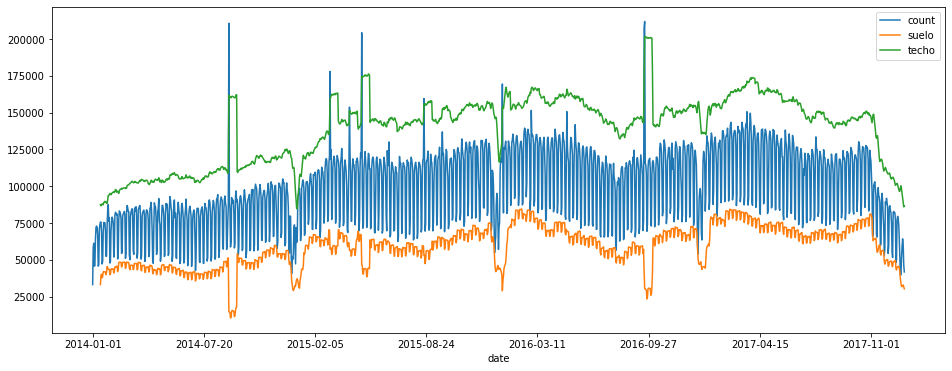

In [14]:
wind = 15
sigma = 2

data["suelo"] = data["count"].rolling(window=wind)\
    .mean() - (sigma * data["count"].rolling(window=wind).std())
data["techo"] = data["count"].rolling(window=wind)\
    .mean() + (sigma * data["count"].rolling(window=wind).std())
data.plot()

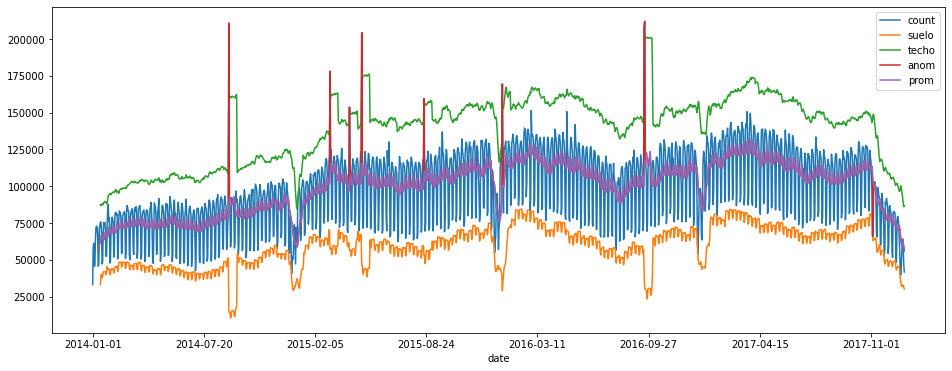

In [45]:
promedio = data['count'].mean()
data["prom"] = data["count"].rolling(12).mean()
data["anom"] = data.apply(
    lambda row: row["count"] if (row["count"]<=row["suelo"] or row["count"]>=row["techo"]) else row["prom"]
, axis=1)
data.plot()

In [46]:
data['count'].mean()


98926.58726899384

In [54]:
# otro tipo de dateccion de anomalias en este caso un escalon en la data input timeserie
# primero se hace una normalizacion de los datos
data3 = pd.read_csv("github_commits_2014_2018.csv", index_col=1 )
data3["otro"] = (data3["count"] - data3['count'].mean())/data3['count'].std()
# se define una plantilla templace 
template = np.concatenate([[-1]*5,[1]*5])


In [55]:
# luego se usa la funcion de correlacion
corr_res = np.correlate(data3["otro"],template ,mode="same")
# y se elege umbral para los resultados (debe definir ese valor en función de su plantilla):
th = 9

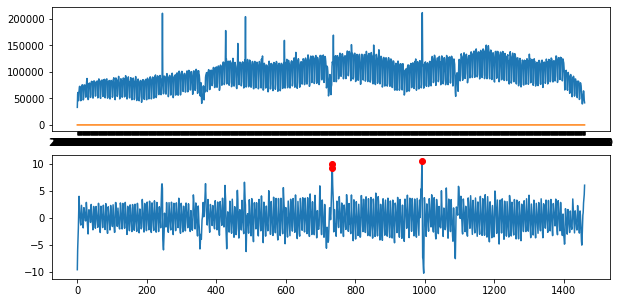

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(data3)
plt.subplot(212)
plt.plot(corr_res)
plt.plot(np.arange(len(corr_res))[corr_res > th],corr_res[corr_res > th],"ro")
plt.show()

In [57]:
data3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2014-01-01 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   1461 non-null   int64  
 1   otro    1461 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 28.5+ KB


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2014-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   1461 non-null   int64  
 1   suelo   1447 non-null   float64
 2   techo   1447 non-null   float64
 3   anom    1450 non-null   float64
 4   prom    1450 non-null   float64
 5   otro    1461 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 74.2+ KB


In [59]:
data.describe()

,count,suelo,techo,anom,prom,otro
count,1461.000000,1447.000000,1447.000000,1450.000000,1450.000000,1.461000e+03
mean,98926.587269,59311.223185,139392.401234,99696.253506,99272.948793,-3.890720e-17
std,25971.731550,13602.495418,22713.446486,17990.852271,16686.973112,1.000000e+00
min,33141.000000,10503.614717,84767.248868,55786.000000,55786.000000,-2.532969e+00
25%,79208.000000,48279.101842,119338.325812,84637.062500,84712.270833,-7.592327e-01
50%,99390.000000,61267.280561,145322.465941,103475.000000,103435.333333,1.784297e-02
75%,120368.000000,69508.668173,155300.443427,112173.458333,111988.833333,8.255673e-01
max,211907.000000,84439.993716,201731.133007,211907.000000,131706.083333,4.350130e+00
